# Изучение рынка заведений общественного питания Москвы

- Автор:Яфаров Ринат
- Дата:21.01.2025-26.01.2025

### Цели и задачи проекта

<font color='black'>Цель проекта заключается в проведении исследовательского анализа рынка общественного питания Москвы с целью выявления оптимального формата заведения (кафе, ресторан или бар), а также определения подходящего местоположения, меню и ценовой политики для нового заведения, которое планируют открыть инвесторы из фонда Shut Up and Take My Money. Результаты анализа помогут принять обоснованные решения, соответствующие текущим трендам и потребительским предпочтениям в сфере общественного питания.</font>

### Описание данных

<font color='black'> Файл `/datasets/rest_info.csv` содержит информацию о заведениях общественного питания:
* `name` — название заведения;
* `address` — адрес заведения;
* `district` — административный район, в котором находится заведение, например Центральный административный округ;
* `category` — категория заведения, например «кафе», «пиццерия» или «кофейня»;
* `hours` — информация о днях и часах работы;
* `rating` — рейтинг заведения по оценкам пользователей в Яндекс Картах (высшая оценка — 5.0);
* `chain` — число, выраженное 0 или 1, которое показывает, является ли заведение сетевым (для маленьких сетей могут встречаться ошибки): 0 — заведение не является сетевым; 1 — заведение является сетевым.
* `seats` — количество посадочных мест.
</font>

<font color='black'> Файл `/datasets/rest_price.csv` содержит информацию о среднем чеке в заведениях общественного питания:
* `price` — категория цен в заведении, например «средние», «ниже среднего», «выше среднего» и так далее;
* `avg_bill` — строка, которая хранит среднюю стоимость заказа в виде диапазона, например:
«Средний счёт: 1000–1500 ₽»;
«Цена чашки капучино: 130–220 ₽»;
«Цена бокала пива: 400–600 ₽».
и так далее;
* `middle_avg_bill` — число с оценкой среднего чека, которое указано только для значений из столбца avg_bill, начинающихся с подстроки «Средний счёт»:
 Если в строке указан ценовой диапазон из двух значений, в столбец войдёт медиана этих двух значений.
 Если в строке указано одно число — цена без диапазона, то в столбец войдёт это число.
 Если значения нет или оно не начинается с подстроки «Средний счёт», то в столбец ничего не войдёт.
* `middle_coffee_cup` — число с оценкой одной чашки капучино, которое указано только для значений из столбца avg_bill, начинающихся с подстроки «Цена одной чашки капучино»:
 Если в строке указан ценовой диапазон из двух значений, в столбец войдёт медиана этих двух значений.
 Если в строке указано одно число — цена без диапазона, то в столбец войдёт это число.
 Если значения нет или оно не начинается с подстроки «Цена одной чашки капучино», то в столбец ничего не войдёт.
</font>

### Содержимое проекта

<font color='black'>Примерный план работы над проектом:    

Шаг 1. Загрузка данных и знакомство с ними    
Шаг 2. Предобработка данных    
Шаг 3. Исследовательский анализ данных
    
Шаг 4. Итоговый вывод и рекомендации
    
</font>


## 1. Загрузка данных и знакомство с ними

- Загрузите данные о заведениях общественного питания Москвы. Путь к файлам: `/datasets/rest_info.csv` и `/datasets/rest_price.csv`.

Прежде чем приступить к загрузке датафреймов, импортируем нужные для работы библиотеки:

In [1]:
!pip install phik

     |████████████████████████████████| 686 kB 1.2 MB/s eta 0:00:01


In [2]:
# Импортируем библиотеки
import pandas as pd

# Загружаем библиотеки для визуализации данных
import matplotlib.pyplot as plt
import seaborn as sns

# Загружаем библиотеку для расчёта коэффициента корреляции phi_k
from phik import phik_matrix


In [3]:
#загрузим для начала основную информацию о заведениях из первого файла:
df1 = pd.read_csv('https://code.s3.yandex.net//datasets/rest_info.csv')

In [4]:
#выводим основную информацию о данных в датафрейме
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        8406 non-null   object 
 1   name      8406 non-null   object 
 2   category  8406 non-null   object 
 3   address   8406 non-null   object 
 4   district  8406 non-null   object 
 5   hours     7870 non-null   object 
 6   rating    8406 non-null   float64
 7   chain     8406 non-null   int64  
 8   seats     4795 non-null   float64
dtypes: float64(2), int64(1), object(6)
memory usage: 591.2+ KB


Можно увидеть, что данные соответствуют описанию. Также стоит отметить, что имеются пропуски, значительное количество пропусков находится в столбце с количеством посадочных мест и чуть меньше пропусков в столбце с информацией о днях и часах работы. Для некоторых столбцов тип данных подобран не совсем корректно, поэтому в дальнейшей работе мы поменяем некоторые типы данных. 
Названия столбцов имеют корректные названия и они все приведены к виду `snake case`

In [5]:
#выведем первые 5 строчек датафрейма:
df1.head()

,id,name,category,address,district,hours,rating,chain,seats
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN
1,045780ada3474c57a2112e505d74b633,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0
2,1070b6b59144425896c65889347fcff6,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0
3,03ac7cd772104f65b58b349dc59f03ee,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,NaN
4,a163aada139c4c7f87b0b1c0b466a50f,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148.0


In [6]:
#выведем последние 5 строчек датафрейма:
df1.tail()

,id,name,category,address,district,hours,rating,chain,seats
8401,0342ad1a45ed41ba89dcba246a8267e5,Суши Мания,кафе,"Москва, Профсоюзная улица, 56",Юго-Западный административный округ,"ежедневно, 09:00–02:00",4.4,0,86.0
8402,ee6bb7c3650e47bd8186fca08eda1091,Миславнес,кафе,"Москва, Пролетарский проспект, 19, корп. 1",Южный административный округ,"ежедневно, 08:00–22:00",4.8,0,150.0
8403,62e8c64d4c89467aba608e39ef87616b,Самовар,кафе,"Москва, Люблинская улица, 112А, стр. 1",Юго-Восточный административный округ,"ежедневно, круглосуточно",3.9,0,150.0
8404,06a0db5ecd4842d48cd6350aa923e297,Чайхана Sabr,кафе,"Москва, Люблинская улица, 112А, стр. 1",Юго-Восточный административный округ,"ежедневно, круглосуточно",4.2,1,150.0
8405,9d56f8f7a7f74df1a925bc0fd2de8aae,Kebab Time,кафе,"Москва, Россошанский проезд, 6",Южный административный округ,"ежедневно, круглосуточно",3.9,0,12.0


In [7]:
#выгрузим данных датафрейма из второго файла:
df2 = pd.read_csv('https://code.s3.yandex.net//datasets/rest_price.csv')

In [8]:
#выводим основную информацию о данных в датафрейме
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4058 entries, 0 to 4057
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4058 non-null   object 
 1   price              3315 non-null   object 
 2   avg_bill           3816 non-null   object 
 3   middle_avg_bill    3149 non-null   float64
 4   middle_coffee_cup  535 non-null    float64
dtypes: float64(2), object(3)
memory usage: 158.6+ KB


В данных датафрейма почти в каждом столбце находятся пропуски, которые нужно будет обработать. Столбцы названы корректно и приведены к стилю `snake case`

In [9]:
#выведем первые 5 строчек датафрейма:
df2.head()

,id,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,045780ada3474c57a2112e505d74b633,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN
1,1070b6b59144425896c65889347fcff6,средние,Средний счёт:от 1000 ₽,1000.0,NaN
2,03ac7cd772104f65b58b349dc59f03ee,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0
3,a163aada139c4c7f87b0b1c0b466a50f,средние,Средний счёт:400–600 ₽,500.0,NaN
4,8a343546b24e4a499ad96eb7d0797a8a,средние,NaN,NaN,NaN


In [10]:
#выведем последние 5 строчек датафрейма:
df2.tail()

,id,price,avg_bill,middle_avg_bill,middle_coffee_cup
4053,962800540173458486f3c465437c2d8b,средние,Цена бокала пива:от 140 ₽,NaN,NaN
4054,4277890d659341848d7051cbf2e51f51,выше среднего,Средний счёт:1000–1500 ₽,1250.0,NaN
4055,026cbc478f9b4c3294a83458dcd89982,средние,NaN,NaN,NaN
4056,71cc394927204d45b81c3a91edb47955,NaN,Средний счёт:50–250 ₽,150.0,NaN
4057,62e8c64d4c89467aba608e39ef87616b,NaN,Средний счёт:от 150 ₽,150.0,NaN


---

### Промежуточный вывод



Датасет `rest_info.csv` содержит 9 столбцов и 8406 строк, в которых представлена основная информация об заведениях общественного питания Москвы.

После первичного анализа данных можно сделать следующие выводы:
- Названия столбцов приведены к единому виду.
- Все представленные данные содержат как строковый формат данных, так и числовой и хранятся в типах данных `object`,`int64`, `float64`. Значения в столбцах `id`, `name`, `category`, `address`, `district` и `hours` представлены строковым форматом. `chain` представлен типом данных `int64` и показывает, является ли заведение сетевым (для маленьких сетей могут встречаться ошибки): 0 — заведение не является сетевым; 1 — заведение является сетевым. `rating`,`seats` представлены типом данных `float64`.
- Пропуски содержатся столбце `seats` и `hours`. Однако следует проверить и другие столбцы: в них могут встречаться значения-индикаторы, которые будут говорить об отсутствии данных.
- Судя по первому знакомству с данными, значения в столбцах соответствуют своему описанию.

Датасет `rest_price.csv` содержит 5 столбцов и 4058 строк, в которых представлена основная информация о ценах в заведениях общественного питания Москвы.

После первичного анализа данных можно сделать следующие выводы:
- Названия столбцов приведены к единому виду.
- Все представленные данные содержат как строковый формат данных, так и числовой и хранятся в типах данных `object`,`float64`. Значения в столбцах `id`, `price`, `avg_bill` представлены строковым форматом. `	middle_avg_bill`,`middle_coffee_cup` представлены типом данных `float64`.
- Пропуски содержатся в столбце `middle_coffee_cup`,`middle_avg_bill`,`price`,`avg_bill`. Такое наличие пропусков может быть связано с тем, что отсутствие информации в столбце может быть вызвано отсутствием необходимой информации в другом столбце.
- Судя по первому знакомству с данными, значения в столбцах соответствуют своему описанию.

### Подготовка единого датафрейма

- Объедините данные двух датасетов в один, с которым вы и продолжите работу.

In [11]:
#создаем общий датафрейм со всеми данными общественного питания города Москвы:
df = df1.merge(df2,on='id',how='left')

In [12]:
#выводим основную информацию объединенного датафрейма:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8406 entries, 0 to 8405
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8406 non-null   object 
 1   name               8406 non-null   object 
 2   category           8406 non-null   object 
 3   address            8406 non-null   object 
 4   district           8406 non-null   object 
 5   hours              7870 non-null   object 
 6   rating             8406 non-null   float64
 7   chain              8406 non-null   int64  
 8   seats              4795 non-null   float64
 9   price              3315 non-null   object 
 10  avg_bill           3816 non-null   object 
 11  middle_avg_bill    3149 non-null   float64
 12  middle_coffee_cup  535 non-null    float64
dtypes: float64(4), int64(1), object(8)
memory usage: 919.4+ KB


In [13]:
#выводим первые 5 строк объединенного датафрейма
df.head()

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN,NaN,NaN,NaN,NaN
1,045780ada3474c57a2112e505d74b633,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN
2,1070b6b59144425896c65889347fcff6,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0,средние,Средний счёт:от 1000 ₽,1000.0,NaN
3,03ac7cd772104f65b58b349dc59f03ee,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,NaN,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0
4,a163aada139c4c7f87b0b1c0b466a50f,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148.0,средние,Средний счёт:400–600 ₽,500.0,NaN


In [14]:
#выводим последние 5 строк объединенного датафрейма
df.tail()

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup
8401,0342ad1a45ed41ba89dcba246a8267e5,Суши Мания,кафе,"Москва, Профсоюзная улица, 56",Юго-Западный административный округ,"ежедневно, 09:00–02:00",4.4,0,86.0,NaN,NaN,NaN,NaN
8402,ee6bb7c3650e47bd8186fca08eda1091,Миславнес,кафе,"Москва, Пролетарский проспект, 19, корп. 1",Южный административный округ,"ежедневно, 08:00–22:00",4.8,0,150.0,NaN,NaN,NaN,NaN
8403,62e8c64d4c89467aba608e39ef87616b,Самовар,кафе,"Москва, Люблинская улица, 112А, стр. 1",Юго-Восточный административный округ,"ежедневно, круглосуточно",3.9,0,150.0,NaN,Средний счёт:от 150 ₽,150.0,NaN
8404,06a0db5ecd4842d48cd6350aa923e297,Чайхана Sabr,кафе,"Москва, Люблинская улица, 112А, стр. 1",Юго-Восточный административный округ,"ежедневно, круглосуточно",4.2,1,150.0,NaN,NaN,NaN,NaN
8405,9d56f8f7a7f74df1a925bc0fd2de8aae,Kebab Time,кафе,"Москва, Россошанский проезд, 6",Южный административный округ,"ежедневно, круглосуточно",3.9,0,12.0,NaN,NaN,NaN,NaN


## 2. Предобработка данных

Подготовьте данные к исследовательскому анализу:


In [15]:
# Выводим типы данных каждой колонки нового датафрейма
df.dtypes

id                    object
name                  object
category              object
address               object
district              object
hours                 object
rating               float64
chain                  int64
seats                float64
price                 object
avg_bill              object
middle_avg_bill      float64
middle_coffee_cup    float64
dtype: object


Типы данных полей `rating` и `chain`, как было отмечено ранее, стоит оптимизировать.


In [16]:
# Оптимизируем типы данных в столбцах
df['rating'] = pd.to_numeric(df['rating'], downcast='float')
df['chain'] = pd.to_numeric(df['chain'], downcast='integer')

In [17]:
# Проверим типы данных после оптимизации
df.dtypes

id                    object
name                  object
category              object
address               object
district              object
hours                 object
rating               float32
chain                   int8
seats                float64
price                 object
avg_bill              object
middle_avg_bill      float64
middle_coffee_cup    float64
dtype: object

При первичном анализе мы обнаружили пропуски в столбце seats,hours,price,avg_bill,middle_avg_bill,middle_coffee_cup датафрейма. Узнаем абсолютное и относительное количество пропусков в этом столбце.

In [18]:
#выводим общее количество пропусков в столбцах датафрейма
df.isna().sum().sort_values(ascending=False)

middle_coffee_cup    7871
middle_avg_bill      5257
price                5091
avg_bill             4590
seats                3611
hours                 536
id                      0
name                    0
category                0
address                 0
district                0
rating                  0
chain                   0
dtype: int64

In [19]:
#выводим долю пропусков в столбцах датафрейма
(df.isna().sum() / df.shape[0]).sort_values(ascending=False)

middle_coffee_cup    0.936355
middle_avg_bill      0.625387
price                0.605639
avg_bill             0.546039
seats                0.429574
hours                0.063764
id                   0.000000
name                 0.000000
category             0.000000
address              0.000000
district             0.000000
rating               0.000000
chain                0.000000
dtype: float64

Пропуски наблюдаются в следующих столбцах: `hours` , `seats`, `avg_bill` , `price`, `middle_avg_bill` и `middle_coffee_cup`.
* Пропуски в данных столбцах форрмируются вполне логично и точного решения, что с ними делать пока нет, по ходу анализа будем предпринимать попытки сократить пропуски или оставим все как есть.
* Разве, что можно в столбце с количеством посадочных мест обработать пропуски значением -1, т.к. при этом значении подсчеты будут отражаться корректно и без больших отклонений, как например при 0
* А также для корректной работы заменим пропуски в `price`, `avg_bill` на пустую строку, так как эти колонки включают текстовые данные и связаны: если нет данных по среднему чеку - нет данных и по категории цены.

In [20]:
# Заменим пропуски в seats
df['seats'] = df['seats'].fillna(-1)

In [21]:
# Заменим пропуски в price и avg_bill
df['price'] = df['price'].fillna('')
df['avg_bill'] = df['avg_bill'].fillna('')

In [22]:
#отобразим показатели пропуского обработанного датафрейма
df.isna().sum()

id                      0
name                    0
category                0
address                 0
district                0
hours                 536
rating                  0
chain                   0
seats                   0
price                   0
avg_bill                0
middle_avg_bill      5257
middle_coffee_cup    7871
dtype: int64

Далее стоит проверить данные на наличие значений-индикаторов:

In [23]:
# Выводим уникальные значения данных в столбцах
for column in ['district', 'category', 'chain', 'price']:
    print(f'Уникальные значения в столбце {column}')
    print(df[column].sort_values().unique())
    print('\n')

Уникальные значения в столбце district
['Восточный административный округ' 'Западный административный округ'
 'Северный административный округ'
 'Северо-Восточный административный округ'
 'Северо-Западный административный округ'
 'Центральный административный округ'
 'Юго-Восточный административный округ'
 'Юго-Западный административный округ' 'Южный административный округ']


Уникальные значения в столбце category
['бар,паб' 'булочная' 'быстрое питание' 'кафе' 'кофейня' 'пиццерия'
 'ресторан' 'столовая']


Уникальные значения в столбце chain
[0 1]


Уникальные значения в столбце price
['' 'высокие' 'выше среднего' 'низкие' 'средние']




Данные выглядят корректно, дополнительный обработки не требуется

In [24]:
# Проверим датафрейм на полные дубликаты
df.duplicated().sum()

0

В датафрейме нет полных дубликатов строк. Перейдем к проверке датафрейма на дубликаты по id, возможна ситуация, когда нескольким заведениям присваивается один и тот же уникальный код, например, из-за технического сбоя.

In [25]:
df.duplicated(subset='id').sum()

0

Дубликатов не обнаружено. Далее проведем проверку на неявные дубликаты, для этого столбцы с названием заведения, адресом приведем к единому текстовому виду

In [26]:
for column in ['name', 'address']:
    df[column] = df[column].str.lower()
df.head()

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,wowфли,кафе,"москва, улица дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,-1.0,,,NaN,NaN
1,045780ada3474c57a2112e505d74b633,четыре комнаты,ресторан,"москва, улица дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN
2,1070b6b59144425896c65889347fcff6,хазри,кафе,"москва, клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0,средние,Средний счёт:от 1000 ₽,1000.0,NaN
3,03ac7cd772104f65b58b349dc59f03ee,dormouse coffee shop,кофейня,"москва, улица маршала федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,-1.0,,Цена чашки капучино:155–185 ₽,NaN,170.0
4,a163aada139c4c7f87b0b1c0b466a50f,иль марко,пиццерия,"москва, правобережная улица, 1б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148.0,средние,Средний счёт:400–600 ₽,500.0,NaN


In [27]:
# Поиск дубликатов по имени и адресу
df.duplicated(subset=['name', 'address']).sum()

4

In [28]:
#удалим дубликаты по имени и адресу:
df= df.drop_duplicates(subset=['name','address'])

In [29]:
# Проверка на удаление дубликатов
df[df.duplicated(subset=['name', 'address'])]

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup


In [30]:
# Определяем функцию, которая создаст новый столбец с бинарным признаком в зависимости от данных в другом столбце
def create_is_hours(x):
    """
    Функция создаёт новый столбец с бинарным признаком, который указывает
    на суть данных в столбце. 
    """
    if x == "ежедневно, круглосуточно":
        return 1
    return 0

In [31]:
# Создаём столбец is_24_7 с помощью функции create_is_hours:
df['is_24_7'] = df['hours'].apply(create_is_hours)
display(df.head())
display(df.tail())

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup,is_24_7
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,wowфли,кафе,"москва, улица дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,-1.0,,,NaN,NaN,0
1,045780ada3474c57a2112e505d74b633,четыре комнаты,ресторан,"москва, улица дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN,0
2,1070b6b59144425896c65889347fcff6,хазри,кафе,"москва, клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0,средние,Средний счёт:от 1000 ₽,1000.0,NaN,0
3,03ac7cd772104f65b58b349dc59f03ee,dormouse coffee shop,кофейня,"москва, улица маршала федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,-1.0,,Цена чашки капучино:155–185 ₽,NaN,170.0,0
4,a163aada139c4c7f87b0b1c0b466a50f,иль марко,пиццерия,"москва, правобережная улица, 1б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148.0,средние,Средний счёт:400–600 ₽,500.0,NaN,0


,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup,is_24_7
8401,0342ad1a45ed41ba89dcba246a8267e5,суши мания,кафе,"москва, профсоюзная улица, 56",Юго-Западный административный округ,"ежедневно, 09:00–02:00",4.4,0,86.0,,,NaN,NaN,0
8402,ee6bb7c3650e47bd8186fca08eda1091,миславнес,кафе,"москва, пролетарский проспект, 19, корп. 1",Южный административный округ,"ежедневно, 08:00–22:00",4.8,0,150.0,,,NaN,NaN,0
8403,62e8c64d4c89467aba608e39ef87616b,самовар,кафе,"москва, люблинская улица, 112а, стр. 1",Юго-Восточный административный округ,"ежедневно, круглосуточно",3.9,0,150.0,,Средний счёт:от 150 ₽,150.0,NaN,1
8404,06a0db5ecd4842d48cd6350aa923e297,чайхана sabr,кафе,"москва, люблинская улица, 112а, стр. 1",Юго-Восточный административный округ,"ежедневно, круглосуточно",4.2,1,150.0,,,NaN,NaN,1
8405,9d56f8f7a7f74df1a925bc0fd2de8aae,kebab time,кафе,"москва, россошанский проезд, 6",Южный административный округ,"ежедневно, круглосуточно",3.9,0,12.0,,,NaN,NaN,1


---

### Промежуточный вывод

После предобработки данных напишите промежуточный вывод о проведённой работе. Отразите количество или долю отфильтрованных данных, если вы что-то удаляли.

В процессе предобработки данных выполнены следующие действия:
* Изучены типы данных каждого столбца, также они оптимизированы с понижением разрядности.
* Проведена работа с пропусками в данных: некоторые заменены, некоторые оставлены. Также категориальны столбцы просмотрены на значения-индикаторы.
* Датафрейм проверен на дубликаты. Полных дубликатов не обнаружено, но обнаружены неявные дубликаты в количестве 4х штук, они удалены из датафрейма.
* Создан новый столбец `is_24_7`, который является показателем, работает ли заведение в ежедневном и круглосуточном ритме.

## 3. Исследовательский анализ данных
Проведите исследовательский анализ исходных данных.

При исследовании данных используйте визуализации. Проверьте, что для каждого случая подобран оптимальный тип визуализации с корректным оформлением. У графика должен быть заголовок, понятные подписи по осям, при необходимости легенда, а его размер является оптимальным для изучения.

После исследования каждого пункта оставляйте небольшой комментарий с выводом или обсуждением результата. В конце шага обобщите результаты, выделив, по вашему мнению, самые важные.

---

### Задача 1

Какие категории заведений представлены в данных? Исследуйте количество объектов общественного питания по каждой категории. Результат сопроводите подходящей визуализацией.

In [32]:
df['category'].unique()

array(['кафе', 'ресторан', 'кофейня', 'пиццерия', 'бар,паб',
       'быстрое питание', 'булочная', 'столовая'], dtype=object)

In [33]:
df['category'].value_counts()

кафе               2376
ресторан           2042
кофейня            1413
бар,паб             764
пиццерия            633
быстрое питание     603
столовая            315
булочная            256
Name: category, dtype: int64

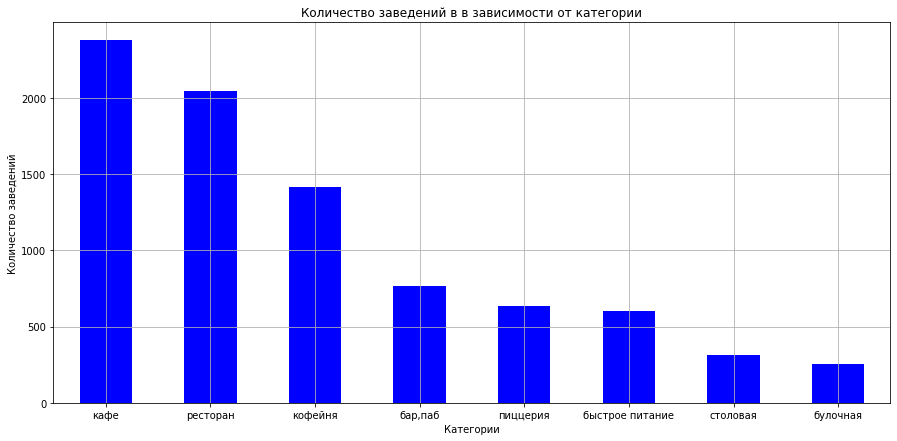

In [34]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(15, 7))

# Строим столбчатую диаграмму с помощью pandas через plot(kind='bar')
df['category'].value_counts().plot(
               kind='bar', # Тип графика - столбчатая диаграмма
               rot=0, # Градус вращения подписи по оси Х
               legend=False, # Выключаем легенду
               title=f'Количество заведений в в зависимости от категории',
               color = 'blue'
)

# Настраиваем оформление графика
plt.xlabel('Категории')
plt.ylabel('Количество заведений')
# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show()

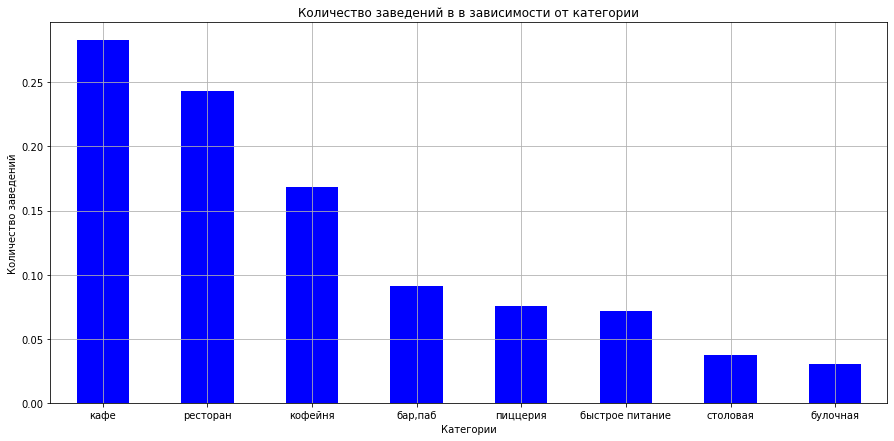

In [35]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(15, 7))

# Строим столбчатую диаграмму с помощью pandas через plot(kind='bar')
df['category'].value_counts(normalize=True).plot(
               kind='bar', # Тип графика - столбчатая диаграмма
               rot=0, # Градус вращения подписи по оси Х
               legend=False, # Выключаем легенду
               title=f'Количество заведений в в зависимости от категории',
               color = 'blue'
)

# Настраиваем оформление графика
plt.xlabel('Категории')
plt.ylabel('Количество заведений')
# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show()

По графику можем сделать вывод, что большинство заведений относится к типу "кафе" (28%), "ресторан" (24%) или "кофейня" (примерно 17%). Не столь популярны "бар, паб", "пиццерия" и "быстрое питание". Замыкают рейтинг "столовая" и "булочная".


Можно предположить, что на первые 3 позиции в распределении есть большой спрос со стороны потребителей, поэтому рейтинг выглядит именно так.

---

### Задача 2

Какие административные районы Москвы присутствуют в данных? Исследуйте распределение количества заведений по административным районам Москвы, а также отдельно распределение заведений каждой категории в Центральном административном округе Москвы. Результат сопроводите подходящими визуализациями.

In [36]:
#выведем основные значения столбца district
df['district'].value_counts()

Центральный административный округ         2242
Северный административный округ             898
Южный административный округ                892
Северо-Восточный административный округ     890
Западный административный округ             850
Восточный административный округ            798
Юго-Восточный административный округ        714
Юго-Западный административный округ         709
Северо-Западный административный округ      409
Name: district, dtype: int64

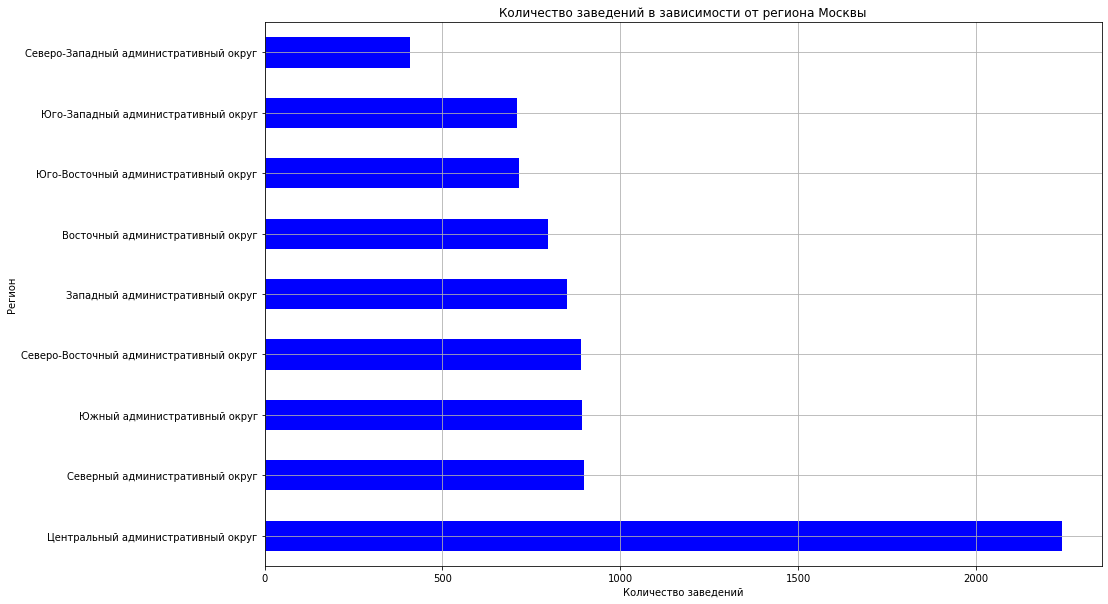

In [37]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(15, 10))

# Строим столбчатую диаграмму с помощью pandas через plot(kind='bar')
df['district'].value_counts().plot(
               kind='barh', # Тип графика - столбчатая диаграмма
               rot=0, # Градус вращения подписи по оси Х
               legend=False, # Выключаем легенду
               title=f'Количество заведений в зависимости от региона Москвы',
               color = 'blue'
)

# Настраиваем оформление графика
plt.xlabel('Количество заведений')
plt.ylabel('Регион')
# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show()

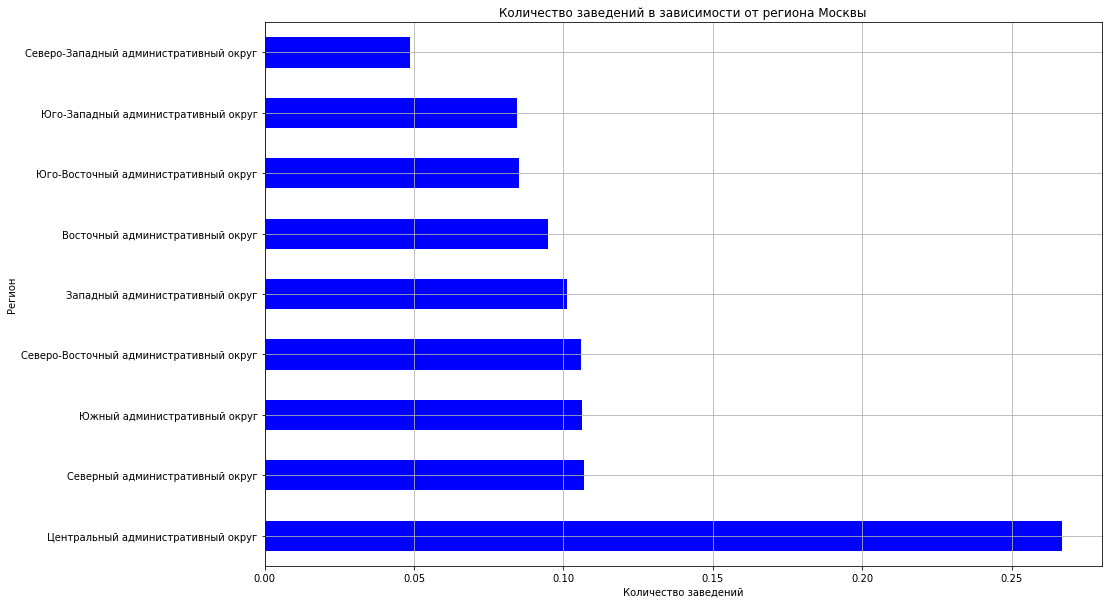

In [38]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(15, 10))

# Строим столбчатую диаграмму с помощью pandas через plot(kind='bar')
df['district'].value_counts(normalize=True).plot(
               kind='barh', # Тип графика - столбчатая диаграмма
               rot=0, # Градус вращения подписи по оси Х
               legend=False, # Выключаем легенду
               title=f'Количество заведений в зависимости от региона Москвы',
               color = 'blue'
)

# Настраиваем оформление графика
plt.xlabel('Количество заведений')
plt.ylabel('Регион')
# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show()

Видим, что значительная часть всех заведений расположена в Центральном административном районе Москвы - примерно 27% от всех, что весьма предсказуемо. Другие районы имеют долю среди остальных в промежутке 8-10%, однако особенно выделяется Северо-Западный административный округ - там заведений общественного питания всего около 5% от общего количества.

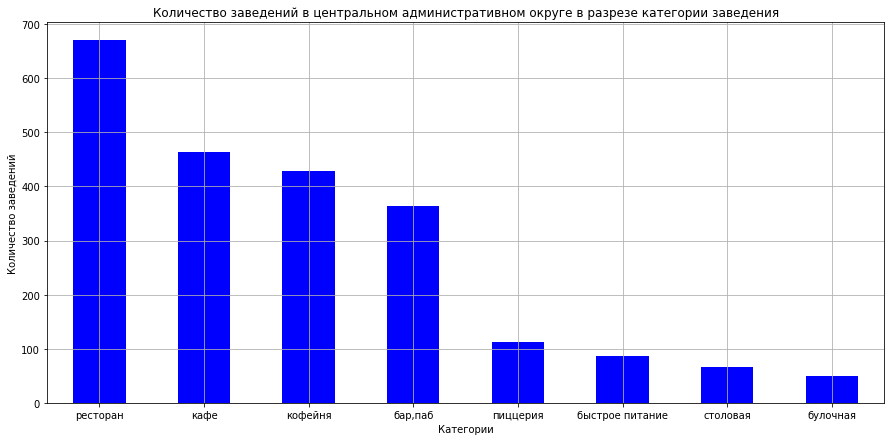

In [39]:
central_districts = ['Центральный административный округ']  # Замените на актуальное название округа, если нужно
filtered_df = df[df['district'].isin(central_districts)]

# Группировка по категориям и подсчет количества заведений
category_counts = filtered_df['category'].value_counts()

# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(15, 7))

# Строим столбчатую диаграмму с помощью pandas через plot(kind='bar')
category_counts.plot(
               kind='bar', # Тип графика - столбчатая диаграмма
               rot=0, # Градус вращения подписи по оси Х
               legend=False, # Выключаем легенду
               title=f'Количество заведений в центральном административном округе в разрезе категории заведения',
               color = 'blue'
)

# Настраиваем оформление графика
plt.xlabel('Категории')
plt.ylabel('Количество заведений')
# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show()

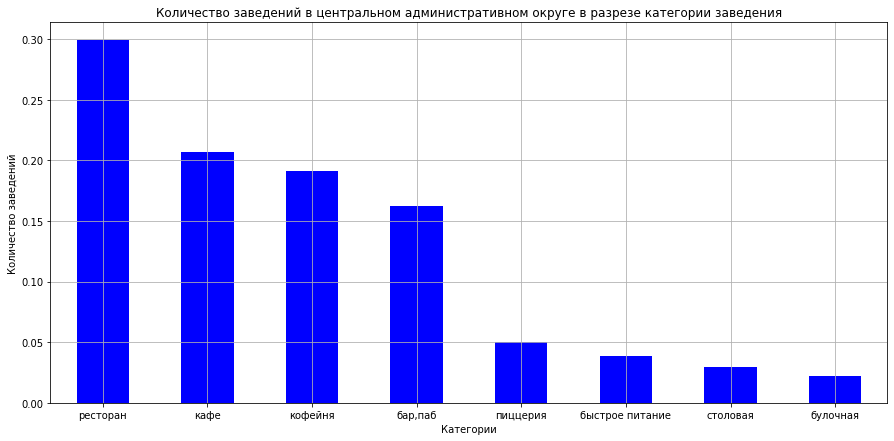

In [40]:
central_districts = ['Центральный административный округ']  # Замените на актуальное название округа, если нужно
filtered_df = df[df['district'].isin(central_districts)]

# Группировка по категориям и подсчет количества заведений
category_counts = filtered_df['category'].value_counts(normalize=True)

# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(15, 7))

# Строим столбчатую диаграмму с помощью pandas через plot(kind='bar')
category_counts.plot(
               kind='bar', # Тип графика - столбчатая диаграмма
               rot=0, # Градус вращения подписи по оси Х
               legend=False, # Выключаем легенду
               title=f'Количество заведений в центральном административном округе в разрезе категории заведения',
               color = 'blue'
)

# Настраиваем оформление графика
plt.xlabel('Категории')
plt.ylabel('Количество заведений')
# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show()

По сравнению с графиком распределения заведений общественного питания по всей Москве график распределения заведений только по Центральному АО выглядит иначе: большая часть заведений - рестораны (почти 30%). Далее идут кафе (около 21%) и кофейни (18%), с незначительным отрывом бары/пабы (16-17%). Однако пиццерии, заведения быстрого питания, столовые и булочные так же непопулярны, как и по всей Москве.

---

### Задача 3

Изучите соотношение сетевых и несетевых заведений в целом по всем данным и в разрезе категорий заведения. Каких заведений больше — сетевых или несетевых? Какие категории заведений чаще являются сетевыми? Исследуйте данные, ответьте на вопросы и постройте необходимые визуализации.

In [41]:
#выводим долю сетевых и несетвых заведений
df['chain'].value_counts(normalize=True)

0    0.618781
1    0.381219
Name: chain, dtype: float64

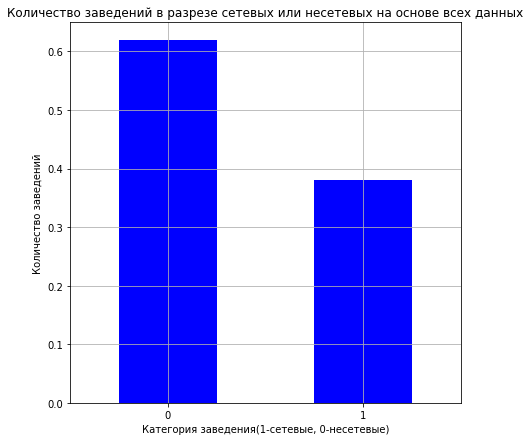

In [42]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(7, 7))

# Строим столбчатую диаграмму с помощью pandas через plot(kind='bar')
df['chain'].value_counts(normalize=True).plot(
               kind='bar', # Тип графика - столбчатая диаграмма
               rot=0, # Градус вращения подписи по оси Х
               legend=False, # Выключаем легенду
               title=f'Количество заведений в разрезе сетевых или несетевых на основе всех данных',
               color = 'blue'
)

# Настраиваем оформление графика
plt.xlabel('Категория заведения(1-сетевые, 0-несетевые)')
plt.ylabel('Количество заведений')
# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show()

Большая часть заведений относится к несетевым точкам - это примерно 62% всех заведений. Остальная часть (38%) - сетевые заведения.

Изучим то же соотношение внутри каждой категории заведений:

In [43]:
# Считаем количество id по категориям и цепочкам
count_series = df.groupby(['category', 'chain'])['id'].count().reset_index(name='count')

# Считаем общее количество категорий
value_counts = df['category'].value_counts().reset_index(name='total_count')
value_counts.columns = ['category', 'total_count']

# Объединяем результаты
result = pd.merge(count_series, value_counts, on='category')

# Теперь можно выполнить деление
result['ratio'] = result['count'] / result['total_count']
display(result)

,category,chain,count,total_count,ratio
0,"бар,паб",0,596,764,0.780105
1,"бар,паб",1,168,764,0.219895
2,булочная,0,99,256,0.386719
3,булочная,1,157,256,0.613281
4,быстрое питание,0,371,603,0.615257
5,быстрое питание,1,232,603,0.384743
6,кафе,0,1597,2376,0.672138
7,кафе,1,779,2376,0.327862
8,кофейня,0,693,1413,0.490446
9,кофейня,1,720,1413,0.509554


<Figure size 1080x1080 with 0 Axes>

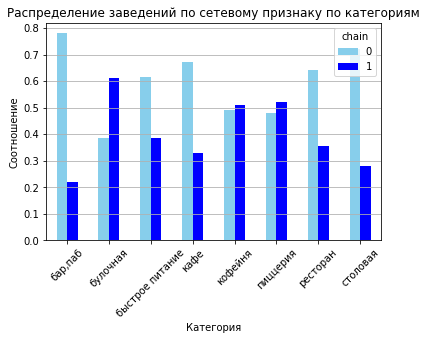

In [44]:
plt.figure(figsize=(15, 15))

# Считаем количество id по категориям и цепочкам
count_series = df.groupby(['category', 'chain'])['id'].count().reset_index(name='count')

# Считаем общее количество категорий
value_counts = df['category'].value_counts().reset_index(name='total_count')
value_counts.columns = ['category', 'total_count']

# Объединяем результаты
result = pd.merge(count_series, value_counts, on='category')

# Теперь можно выполнить деление
result['ratio'] = result['count'] / result['total_count']

# Используем pivot_table для подготовки данных к визуализации
pivot_data = result.pivot_table(index='category', columns='chain', values='ratio', fill_value=0)

# Строим график
pivot_data.plot(
    kind='bar',
    color=['skyblue','blue'],
    rot=45,
    legend=True,
    title='Распределение заведений по сетевому признаку по категориям'
)

plt.xlabel('Категория')
plt.ylabel('Соотношение')
plt.grid(axis='y')
plt.show()

По представленному распределению чаще всего к сетевым заведениям (*темный синий цвет*) относятся булочные, пиццерии и кофейни. У несетевых заведений (*голубой цвет*) распределение следующее: бары, столовые, кафе, рестораны и точки быстрого питания. Такое количество несетевых точек может свидетельствовать о том, что собственникам бизнеса тяжело открывать новые заведения, либо же такой потребности пока нет.


Более подробно поработаем с долей сетевых заведений, подкрепим выводы отдельной наглядной визуализацией:

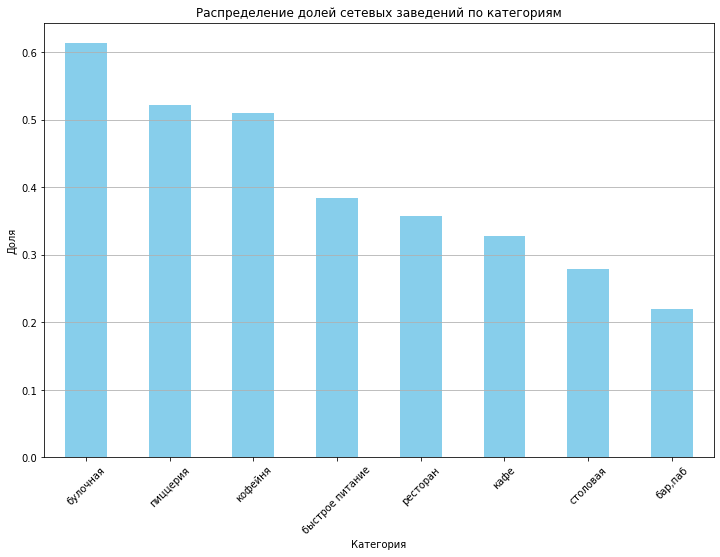

In [45]:
# Построим визуализацию долей сетевых заведений
plt.figure(figsize=(12, 8))

df.groupby('category')['chain'].mean().sort_values(ascending=False).plot(
    kind='bar',
    color='skyblue',
    rot = 45,
    legend=False,
    title='Распределение долей сетевых заведений по категориям')

plt.xlabel('Категория')
plt.ylabel('Доля')
plt.grid(axis='y')
plt.show()

Выводы подтвердились, к сетевым заведениям и правда чаще всего относятся булочные, пиццерии, кофейни, точки быстрого питания.

---

### Задача 4

Исследуйте количество посадочных мест в заведениях. Встречаются ли в данных аномальные значения или выбросы? Если да, то с чем они могут быть связаны? Приведите для каждой категории заведений наиболее типичное для него количество посадочных мест. Результат сопроводите подходящими визуализациями.


In [46]:
# Получим общую информацию по данным о посадочных местах
df[df['seats'] != -1]['seats'].describe()

count    4792.000000
mean      108.361436
std       122.841130
min         0.000000
25%        40.000000
50%        75.000000
75%       140.000000
max      1288.000000
Name: seats, dtype: float64

Мы наблюдаем, что наиболее распространенное значение количества посадочных мест среди всех данных составляет 108. Тем не менее, среднее значение по этому столбцу может существенно искажаться из-за возможных выбросов, поэтому имеет смысл рассмотреть медиану (50%-й квантиль), которая равна 75. Среднее арифметическое и медиана заметно различаются, что может указывать на наличие выбросов, влияющих на типичное значение. Также вызывает вопросы максимальное количество мест — 1288. Вряд ли какое-либо кафе или ресторан сможет разместить такое количество посетителей.

Для более подробного изучения обратимся к гистограмме распределения и диаграмме размаха:

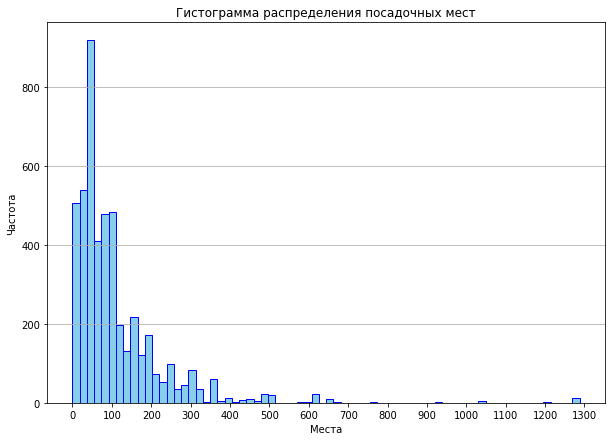

In [47]:
# Построим гистограмму распределения
plt.figure(figsize=(10, 7))

df[df['seats'] != -1]['seats'].plot(
    kind='hist',
    bins=70,
    color='skyblue',
    edgecolor='b',
    title='Гистограмма распределения посадочных мест')

plt.xlabel('Места')
plt.ylabel('Частота')
plt.xticks(range(0, 1400, 100))
plt.grid(axis='y')
plt.show()

Text(0.5, 1.0, 'Распределение количества посадочных мест')

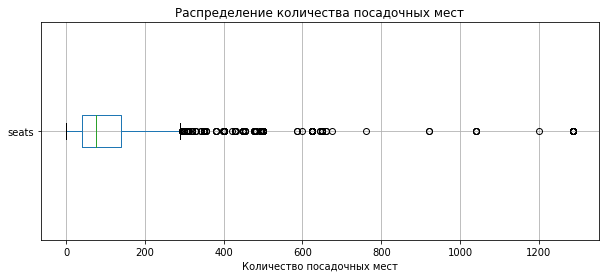

In [48]:
# Построим диаграмму размаха
plt.figure(figsize=(10, 4))

# Подготовим датафрейм без искажающих результаты данных (замененных на -1 пропусков)
df_seats = df[df['seats'] != -1]
df_seats.boxplot(column='seats', vert=False)

plt.xlabel('Количество посадочных мест')
plt.title('Распределение количества посадочных мест')

По гистограмме видно, что основная часть количества посадочных мест сосредоточена в диапазоне от 0 до 200. Распределение имеет правоасимметричный характер с длинным правым хвостом, что связано с наличием значений, значительно превышающих среднее. Диаграмма размаха подтверждает наличие выбросов, причем к ним относятся значения выше 300 мест. Можно предположить, что в данных присутствуют записи о больших залах, специально подготовленных для определенных мероприятий. Аномальные значения встречаются изолированно (например, количество мест свыше 600), что может указывать на ошибки в общедоступных источниках данных или на влияние человеческого фактора.

Теперь мы разделим заведения на категории и определим типичное количество мест для каждой из них. Для более точного анализа заранее отфильтруем датафрейм, исключив заведения с количеством мест менее 300. В качестве типичного значения целесообразнее использовать медиану, поскольку количество мест является целочисленным типом данных, и это также позволит лучше отобразить результаты на графике.

In [49]:
# Выведем для каждой категории типичное количество мест
df_add = df[(df['seats'] != -1) & (df['seats'] < 300)]
df_add.groupby('category')['seats'].median()

category
бар,паб            77.0
булочная           48.0
быстрое питание    60.0
кафе               55.0
кофейня            70.0
пиццерия           50.0
ресторан           80.0
столовая           70.0
Name: seats, dtype: float64

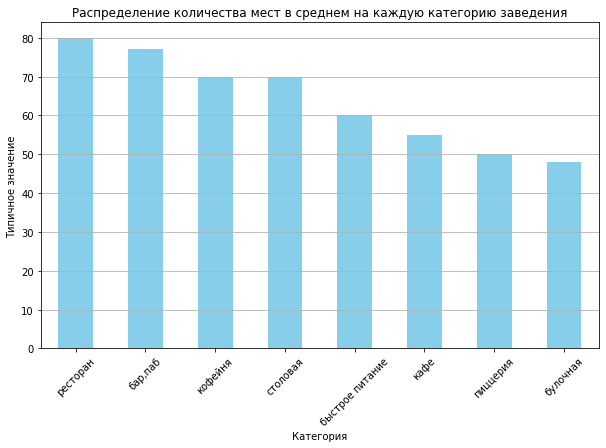

In [50]:
# Построим визуализацию типичного значения количества мест для каждой категории
plt.figure(figsize=(10, 6))

df_add.groupby('category')['seats'].median().sort_values(ascending=False).plot(
    kind='bar',
    color='skyblue',
    rot=45,
    legend=False,
    title='Распределение количества мест в среднем на каждую категорию заведения')

plt.xlabel('Категория')
plt.ylabel('Типичное значение')
plt.grid(axis='y')
plt.show()

Наиболее типичное количество мест имеет высокие значения у ресторанов, баров и столовых. Для кофеен это необычный показатель, нужно более подробно изучить данные. Меньшее количество посадочных мест у заведений быстрого питания, кафе, пиццерий и булочных.

---

### Задача 5

Исследуйте рейтинг заведений. Визуализируйте распределение средних рейтингов по категориям заведений. Сильно ли различаются усреднённые рейтинги для разных типов общепита?

In [51]:
# Получим статистические показатели по рейтингам заведений
df['rating'].describe()

count    8402.000000
mean        4.230016
std         0.470320
min         1.000000
25%         4.100000
50%         4.300000
75%         4.400000
max         5.000000
Name: rating, dtype: float64

Можно отметить, что минимальная оценка составляет `1.0`, а максимальная - `5.0`. Среднее значение `4.23` несильно отличается от медианы, которая составляет оценку `4.3`.

In [52]:
# Выявим средние рейтинги по категориям заведений
df.groupby('category')['rating'].mean().sort_values()

category
быстрое питание    4.050249
кафе               4.124285
столовая           4.211429
булочная           4.268359
кофейня            4.277282
ресторан           4.290401
пиццерия           4.301264
бар,паб            4.387696
Name: rating, dtype: float32

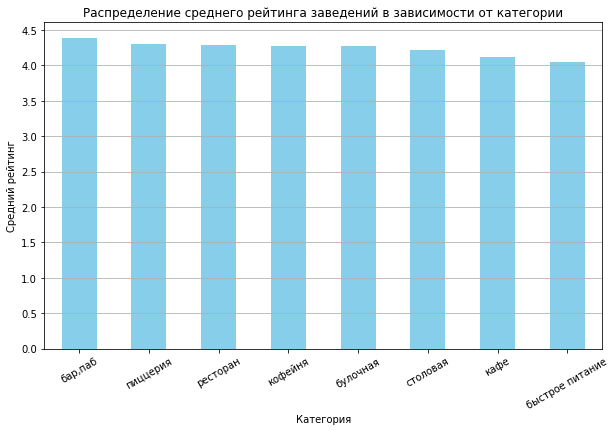

In [53]:
# Визуализируем полученные данные с помощью столбачтой диаграммы
import numpy as np

plt.figure(figsize=(10, 6))

df.groupby('category')['rating'].mean().sort_values(ascending=False).plot(
    kind='bar',
    color='skyblue',
    rot=30,
    legend=False,
    title='Распределение среднего рейтинга заведений в зависимости от категории')

plt.xlabel('Категория')
plt.ylabel('Средний рейтинг')
plt.grid(axis='y')
plt.yticks(np.arange(0, 5, 0.5))
plt.show()

По графику заметно, что усредненные рейтинги лежат в диапазоне `4.1-4.4` для каждой категории заведений. Самые высокие оценки заслужили бары и пабы с показателем с округлением в `4.4`. Средние рейтинги булочных, кофеен, пиццерий и ресторанов практически одинаковы и составляют приблизительно `4.3`, что является довольно неплохой оценкой. Рейтинги столовых и кафе составляют `4.2` и `4.1` соответственно. Минимальный средний рейтинг у заведений быстрого питания - `4.05`, что можно объяснить тем, что подобные заведения нацелены на скорое обслуживание, а не на качество предоставляемых блюд.

---

### Задача 6

Изучите, с какими данными показывают самую сильную корреляцию рейтинги заведений? Постройте и визуализируйте матрицу корреляции рейтинга заведения с разными данными: его категория, положение (административный район Москвы), статус сетевого заведения, количество мест, ценовая категория и признак, является ли заведения круглосуточным. Выберите самую сильную связь и проверьте её.

In [54]:
# Вычислим корреляционную матрицу
df_add = df[(df['seats'] != -1) & (df['price'] != '')] # Отсеиваем пропуски, которые были заменены на определенные значения
corr_matrix = df_add[['category', 'district', 'rating', 'chain', 'seats', 'price', 'is_24_7']].phik_matrix()

print('Корреляционная матрица для переменной rating:')
corr_matrix.loc[corr_matrix.index != 'rating'][['rating']].sort_values(by='rating', ascending=False)

interval columns not set, guessing: ['rating', 'chain', 'seats', 'is_24_7']
Корреляционная матрица для переменной rating:


,rating
district,0.276956
price,0.257868
category,0.188884
is_24_7,0.088509
chain,0.065368
seats,0.000000


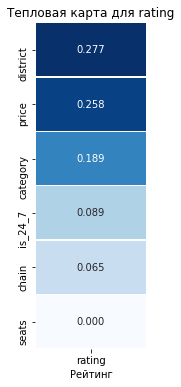

In [55]:
plt.figure(figsize=(2, 6))

df_heatmap = corr_matrix.loc[corr_matrix.index != 'rating'][['rating']].sort_values(by='rating', ascending=False)
sns.heatmap(data=df_heatmap,
            annot=True,
            fmt='.3f',
            linewidths=0.5,
            cbar=False,
            cmap='Blues')

plt.title('Тепловая карта для rating')
plt.xlabel('Рейтинг')
plt.show()

Видим, что наибольшая корреляция наблюдается с расположением заведения `district` - 0.28. Далее идут ценовая категория 'price' (0.26) и категория самого заведения (0.19). Не столь существенна корреляция рейтинга с показателем круглосуточной работы `is_24_7` (0.09) и показателем сети заведений `chain` (0.07). Нулевая корреляция наблюдается с показателем количества посадочных мест `seats` (0.0).

Выберем самую сильную связь и проверим её.

/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


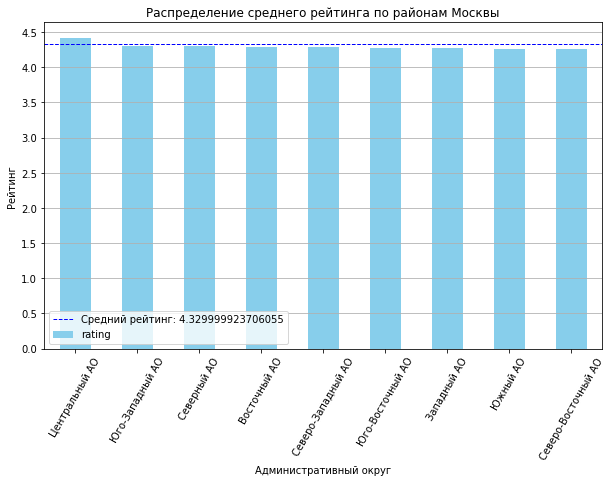

In [56]:
plt.figure(figsize=(10, 6))

df_add.loc[:, 'district'] = df_add.loc[:, 'district'].str.replace('административный округ', 'АО') # Для удобства отображения на графике

df_add.groupby('district')['rating'].mean().sort_values(ascending=False).plot(
    kind='bar',
    color='skyblue',
    rot=60,
    title='Распределение среднего рейтинга по районам Москвы')

mean_rating = df_add['rating'].mean()

plt.axhline(mean_rating,
            color='blue',
            linestyle='--',
            linewidth=1,
            label=f'Средний рейтинг: {round(mean_rating,2)}')

plt.xlabel('Административный округ')
plt.ylabel('Рейтинг')
plt.grid(axis='y')
plt.yticks(np.arange(0, 5, 0.5))
plt.legend()
plt.show()

Видно, что в разбросе рейтинга по районам нет больших отличий. Однако в определенной мере расположение заведения влияет на его рейтинг. Так, самые выскокие оценки у заведений, расположенных в Центральном АО, что является объяснимым: центр Москвы пестрит крупными и шикарными заведениями с соответствующим уровнем обслуживания. Высокие показатели также у Северного и Юго-Западного административных округов.

---

### Задача 7

Сгруппируйте данные по названиям заведений и найдите топ-15 популярных сетей в Москве. Для них посчитайте значения среднего рейтинга. Под популярностью понимается количество заведений этой сети в регионе. К какой категории заведений они относятся? Результат сопроводите подходящими визуализациями.

In [57]:
# Найдем топ-15 популярных сетей в Москве
df['name'].value_counts().head(15)

кафе                                   188
шоколадница                            120
домино'с пицца                          77
додо пицца                              74
one price coffee                        72
яндекс лавка                            69
cofix                                   65
prime                                   50
хинкальная                              44
шаурма                                  43
кофепорт                                42
кулинарная лавка братьев караваевых     39
теремок                                 38
чайхана                                 37
ресторан                                34
Name: name, dtype: int64

In [58]:
# Для каждой позиции в топе посчитаем значения среднего рейтинга
df.groupby('name').agg({'id': 'count', 'rating': 'mean'}).sort_values(by='id', ascending=False).head(15)

,id,rating
name,,
кафе,188,3.884574
шоколадница,120,4.177500
домино'с пицца,77,4.171429
додо пицца,74,4.286487
one price coffee,72,4.069445
яндекс лавка,69,3.872464
cofix,65,4.075385
prime,50,4.116000
хинкальная,44,4.322727


<Figure size 864x576 with 0 Axes>

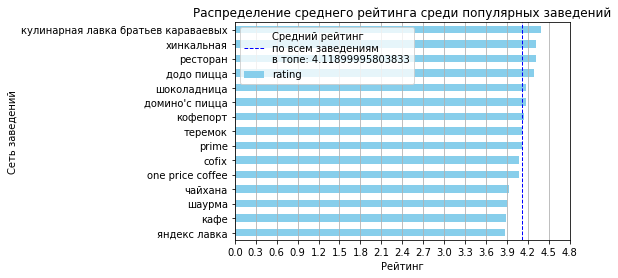

In [59]:
# Построим визуализацию распределения среднего рейтинга среди популярных точек


plt.figure(figsize=(12, 8))

df_add1 = df.groupby('name').agg({'id': 'count', 'rating': 'mean'}).sort_values(by='id', ascending=False).head(15)
df_add1.sort_values(by='rating', ascending=True).plot(
        kind='barh', 
        y='rating',
        color='skyblue',
        legend=False,
        title='Распределение среднего рейтинга среди популярных заведений')

mean_rating = df_add1['rating'].mean()
plt.axvline(mean_rating,
            color='blue',
            linestyle='--',
            linewidth=1,
            label=f'Средний рейтинг \nпо всем заведениям \nв топе: {round(mean_rating, 3)}')

plt.xlabel('Рейтинг')
plt.ylabel('Сеть заведений')
plt.grid(axis='x')
plt.xticks(np.arange(0, 5, 0.3))
plt.legend()
plt.show()

Наиболее успешными с точки зрения потребительских оценок являются такие сети как "кулинарная лавка братьев караваевых", "хинкальная", "ресторан", "додо пицца", "шоколадница", "домино'с пицца", "кофепорт" и "теремок". Рейтинг остальных заведений падает ниже среднего (`4.12`), отличаются типы заведений "шаурма", "кафе" и "яндекс лавка" - их рейтинг ниже `4.0`.

In [60]:
# Определяем категорию заведений
df.groupby(['name', 'category'])['id'].count().sort_values(ascending=False).head(15)

name                                 category       
кафе                                 кафе               158
шоколадница                          кофейня            119
домино'с пицца                       пиццерия            77
додо пицца                           пиццерия            74
one price coffee                     кофейня             72
яндекс лавка                         ресторан            69
cofix                                кофейня             65
prime                                ресторан            49
кофепорт                             кофейня             42
кулинарная лавка братьев караваевых  кафе                39
теремок                              ресторан            36
ресторан                             ресторан            33
шаурма                               быстрое питание     32
cofefest                             кофейня             31
чайхана                              кафе                26
Name: id, dtype: int64

In [61]:
# Получим список наименований заведений
list_names = df_add1.reset_index()['name'].tolist()

# Отфильтруем датафрейм только по названиям из топа
df_filter = df[df['name'].isin(list_names)]

# Определим категории заведений
df_filter.groupby(['name', 'category'])['id'].count()

name                                 category       
cofix                                кофейня             65
one price coffee                     кофейня             72
prime                                кафе                 1
                                     ресторан            49
додо пицца                           пиццерия            74
домино'с пицца                       пиццерия            77
кафе                                 бар,паб              2
                                     быстрое питание      7
                                     кафе               158
                                     кофейня              6
                                     пиццерия             1
                                     ресторан             8
                                     столовая             6
кофепорт                             кофейня             42
кулинарная лавка братьев караваевых  кафе                39
ресторан                             пиццерия  

Видно, что большинство популярных заведений относятся к категориям "кафе", "кофейня", "пиццерия", "ресторан" и "быстрое питание".

---

### Задача 8

Изучите вариацию среднего чека заведения (столбец `middle_avg_bill`) в зависимости от района Москвы. Проанализируйте цены в Центральном административном округе и других. Как удалённость от центра влияет на цены в заведениях? Результат сопроводите подходящими визуализациями.


In [62]:
# Выведем статистические показатели по столбцу
df[df['middle_avg_bill'] != np.nan]['middle_avg_bill'].describe()

count     3149.000000
mean       958.053668
std       1009.732845
min          0.000000
25%        375.000000
50%        750.000000
75%       1250.000000
max      35000.000000
Name: middle_avg_bill, dtype: float64

По статистическим показателям видна скошенность среднего значения к области высоких значений. Это можно понять при сравнении среднего `958` и медианы `750`. Возможно, выбросы связаны с очень дорогими ресторанами или другими исключительными заведениями.

In [63]:
# Изучим вариацию среднего чека заведения в зависимости от района Москвы
df.groupby('district')['middle_avg_bill'].mean().sort_values(ascending=False)

district
Центральный административный округ         1191.057547
Западный административный округ            1053.225490
Северный административный округ             927.959627
Южный административный округ                834.398089
Северо-Западный административный округ      822.222930
Восточный административный округ            820.626923
Юго-Западный административный округ         792.561702
Северо-Восточный административный округ     716.611296
Юго-Восточный административный округ        654.097938
Name: middle_avg_bill, dtype: float64

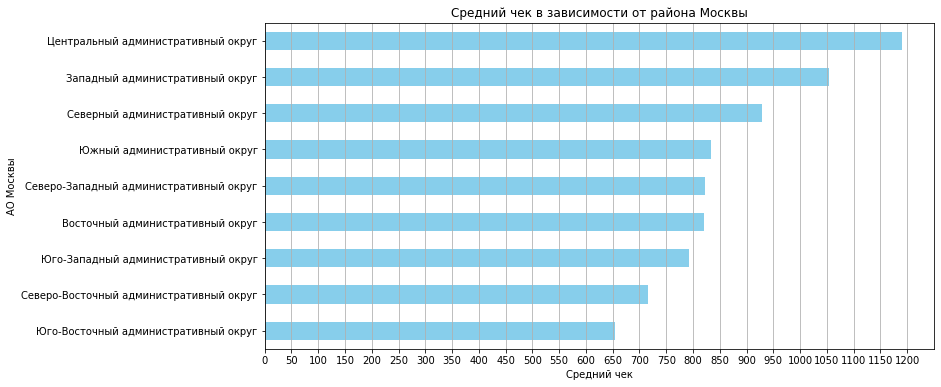

In [64]:
# Построим визуализацию вариаций среднего чека в зависимости от местоположения заведения
plt.figure(figsize=(12, 6))

df.groupby('district')['middle_avg_bill'].mean().sort_values(ascending=True).plot(
    kind='barh',
    color='skyblue',
    title='Средний чек в зависимости от района Москвы')

plt.xlabel('Средний чек')
plt.ylabel('АО Москвы')
plt.grid(axis='x')
plt.xticks(range(0, 1250, 50))
plt.show()

По графику можно увидеть, что в Центральном административном округе самый большой средний чек в заведениях - около 1200. Это можно объяснить, например, высокой арендной платой за площадь собственников заведений и более высоким уровнем обслуживания с упором на обсепеченных людей. 

Далее идет Западный административный округ с показателем около 1000 рублей, затем Северный административный округ - примерно 925 рублей. Южный, Северо-Западный и Восточный административные округа находятся примерно на одном уровне по значению среднего чека - 825 рублей. Самое минимальное его значение в Юго-Восточном административном округе - 650 рублей.

Можно сделать вывод, что удаленность от центра влияет прямо противоположно на средний чек в заведениях: чем больше расстояние от центра города, тем меньшая сумма среднего чека наблюдается.

---

### Задача 9

 При необходимости проведите исследования других данных и их взаимосвязи. Например, часы работы заведений или стоимость чашки кофе в зависимости от расположения или типа заведения.


In [65]:
# Считаем количество заведений по округам и режиму работы
count_by_district_and_mode = df.groupby(['district', 'is_24_7'])['id'].count().reset_index()

# Считаем общее количество заведений по округам
total_count_by_district = df['district'].value_counts().reset_index()
total_count_by_district.columns = ['district', 'total']

# Объединяем оба датафрейма по округам
merged_df = count_by_district_and_mode.merge(total_count_by_district, on='district')

# Рассчитываем долю заведений, работающих 24/7
merged_df['proportion'] = merged_df['id'] / merged_df['total']

# Пивотируем таблицу для удобного отображения
result = merged_df.pivot(index='district', columns='is_24_7', values='proportion')

# Выводим результат
display(result)

is_24_7,0,1
district,,
Восточный административный округ,0.878446,0.121554
Западный административный округ,0.915294,0.084706
Северный административный округ,0.920935,0.079065
Северо-Восточный административный округ,0.915730,0.084270
Северо-Западный административный округ,0.894866,0.105134
Центральный административный округ,0.941570,0.058430
Юго-Восточный административный округ,0.869748,0.130252
Юго-Западный административный округ,0.897038,0.102962
Южный административный округ,0.915919,0.084081


<Figure size 864x576 with 0 Axes>

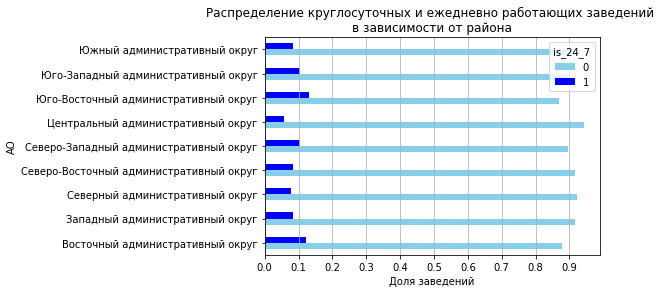

In [66]:
# Визуализируем распределение долей

plt.figure(figsize=(12, 8))

# Считаем количество заведений по округам и режиму работы
count_by_district_and_mode = df.groupby(['district', 'is_24_7'])['id'].count().reset_index()

# Считаем общее количество заведений по округам
total_count_by_district = df['district'].value_counts().reset_index()
total_count_by_district.columns = ['district', 'total']

# Объединяем оба датафрейма по округам
merged_df = count_by_district_and_mode.merge(total_count_by_district, on='district')

# Рассчитываем долю заведений, работающих 24/7
merged_df['proportion'] = merged_df['id'] / merged_df['total']

# Пивотируем таблицу для удобного отображения
result = merged_df.pivot(index='district', columns='is_24_7', values='proportion')
result.plot(kind='barh',
             color=['skyblue','blue'],
             title='Распределение круглосуточных и ежедневно работающих заведений \nв зависимости от района')
plt.xlabel('Доля заведений')
plt.ylabel('АО')
plt.grid(axis='x')
plt.xticks(np.arange(0, 1, 0.1))
plt.show()

Такая визуализация неудобна для анализа, возьмем данные только по работающим круглосуточно и ежедневно точкам общественного питания.

In [67]:
# Возьмем данные только для работающих круглосуточно и ежедневно заведений
df.groupby('district')['is_24_7'].mean().sort_values(ascending=False)

district
Юго-Восточный административный округ       0.130252
Восточный административный округ           0.121554
Северо-Западный административный округ     0.105134
Юго-Западный административный округ        0.102962
Западный административный округ            0.084706
Северо-Восточный административный округ    0.084270
Южный административный округ               0.084081
Северный административный округ            0.079065
Центральный административный округ         0.058430
Name: is_24_7, dtype: float64

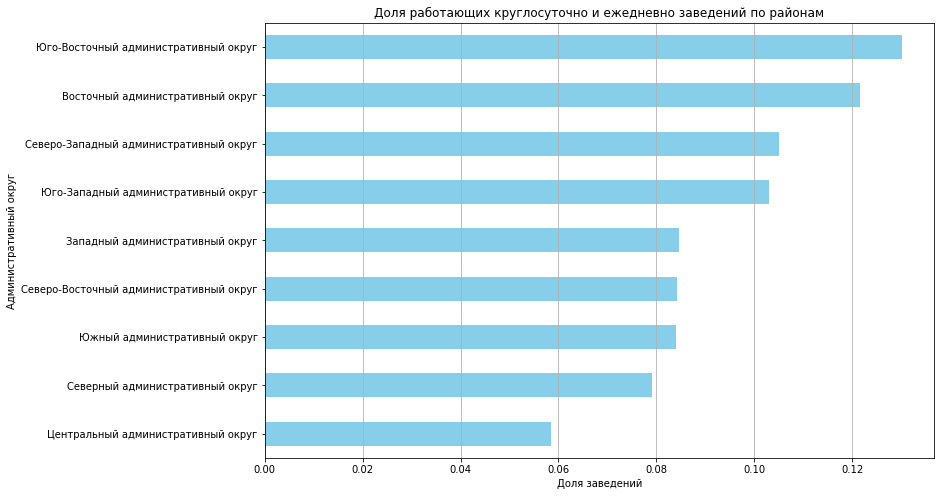

In [68]:
# Построим визуализацию
plt.figure(figsize=(12, 8))

df.groupby('district')['is_24_7'].mean().sort_values(ascending=True).plot(
    kind='barh',
    color='skyblue',
    title='Доля работающих круглосуточно и ежедневно заведений по районам')

plt.xlabel('Доля заведений')
plt.ylabel('Административный округ')
plt.grid(axis='x')
plt.show()

По графику можно сделать вывод, что больше всего заведений, работающих круглосуточно и ежедневно, находится в Юго-Восточном округе. Также таких заведений немало в Восточном АО, Северо-Западном АО и Юго-Западном АО. Любопытно, что в Центральном административном округе, имеющем рекордное количество заведений общественного питания, доля работающих круглосуточно и ежедневно минимальна среди других районов.

---

### Промежуточный вывод

Обобщите полученные результаты, выделив, по вашему мнению, самые важные.

Исследовательский анализ данных показал:
* Среди категорий общественного питания большой популярностью пользуются кафе, рестораны и кофейни.
* Количество заведений общепита распределено неравномерно по районам Москвы: 27% находится в Центральном административном округе, по 10-11% приходится на Северный, Южный, Северо-Восточный и Западный административные округа, остальные заведения расположены в оставшихся районных единицах. При этом в ЦАО больше всего ресторанов, далее идут кафе и кофейни.
* Доля сетевых заведений составляет чуть больше трети от всех - 32%. Причем к сетевым точкам чаще всего относятся булочные, пиццерии и кофейни, к несетевым - бары, столовые, кафе.
* Посадочных мест больше всего в ресторанах, барах, кофейнях и столовых.
* Рейтинг всех заведений неплохой, колеблется в диапазоне 4.1-4.4. Максимальная оценка у баров - 4.4, минимальная - у заведений быстрого питания 4.05.
* Рейтинги в зависимости от расположения заведений распределяются примерно равномерно.
* Выделен топ-15 популярных заведений. Их рейтинг колеблется от 3.9 до 4.4.
* Выявлена связь среднего чека блюд с расположением заведения: удаляясь от центра Москвы, средний чек уменьшается.

## 4. Итоговый вывод и рекомендации

### Общий обзор проделанной работы
В ходе работы исследовано более 8000 данных, связанных с заведениями общественного питания. Данные включали информацию о наименовании заведения, адресе, административном районе, категории заведения, днях и часах работы, пользовательском рейтинге, показателе сети и количестве посадочных мест. Также к основным данным был присоединен датафрейм с содержанием категорий цен в заведении и среднем чеке, данные были предоставлены не для каждого заведения.

Задача состояла в том, чтобы помочь инвесторам проекта провести анализ рынка Москвы в сфере общественного питания за 2022 год.

### Главные выводы
По проведенному анализу можно сделать следующие выводы:
* Основная часть рынка Москвы представлена заведениями типа "кафе" (28%), "ресторан" (24%) и "кофейня" (17%). Не столь большую долю составляют столовые и булочные. Важно определиться с выбором категории будущего заведения в зависимости от возможностей и желания инвесторов.
* Также стоит обратить внимание на то, что пик количества заведений приходится на Центральный административный район, остальные районы более "свободны".
* Основную долю составляют несетевые заведения (62%), поэтому на первых порах важно сосредоточиться на развитии первой открывшейся точки, а далее развиваться в соответствии с накопленным потенциалом.

### Рекомендации
1. В качестве нового заведения можно обратить внимание как на популярные типы заведений (кафе, рестораны и кофейни), однако стоит понимать, что конкуренция среди этих типов высока - подобных точек общественного питания большое количество и нужно будет искать способы привлечения клиентов в свое заведение, так и на не столь распространенные типы - например, пиццерии, столовые, булочные.
2. Для оптимального старта лучше всего выбрать местоположение будущего заведения в Юго-Восточном, Юго-Западном и Северо-Западном административных округах. Количество уже имеющихся точек общественного питания здесь не столь высоко, поэтому новичкам, вероятнее всего, будет легче вести бизнес. Также важно понимать, что некоторые районы в административных округах могут быть "спальными", что повлияет на выбор типа заведения.
3. Можно обратить внимание на открытие круглосуточной и ежедневно работающей точки, так как доля подобных заведений в Москве невысока. Однако требуется больше данных, которых нет в предоставленной выборке, чтобы оценить спрос на заведения подобного рода.
4. Ввиду большого количества заведений важно акцентировать внимание заведения на чем-то оригинальном, не похожим на другие заведения, установить лояльные, но приносящие прибыль, цены, а также сосредоточить внимание на сервисе.